In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('merged_data.csv')

In [ ]:
data.head()

,Spin Trap with comments,aN,aH,aN/aH,Comments,Spin Trap
0,DMPO * .CH(OH)CH3in AQ07P2,15.80,22.80,0.69,Cr(VI)+NADPH+H2O2+EtOH,OH
1,DMPO * .OHin AQ07P4,14.97,14.97,1.00,X/XO + DSF in chelex-treated buffer,OH
2,DMPO * .OHin AQ0,15.30,15.30,1.00,"2.0061; H=.61,.25, H2O2 + UV",OH
3,DMPO * .OHin AQ06P0,NaN,NaN,NaN,@KF=2.0E9; H2O2+hv,OH
4,DMPO * .O2Hin AQ07M0,NaN,NaN,NaN,pea chloroplasts + paraquat,O2H


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Spin Trap with comments  565 non-null    object 
 1   aN                       492 non-null    float64
 2   aH                       490 non-null    float64
 3   aN/aH                    455 non-null    float64
 4   Comments                 565 non-null    object 
 5   Spin Trap                565 non-null    object 
dtypes: float64(3), object(3)
memory usage: 26.6+ KB


In [ ]:
data.shape

(565, 6)

In [ ]:

# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

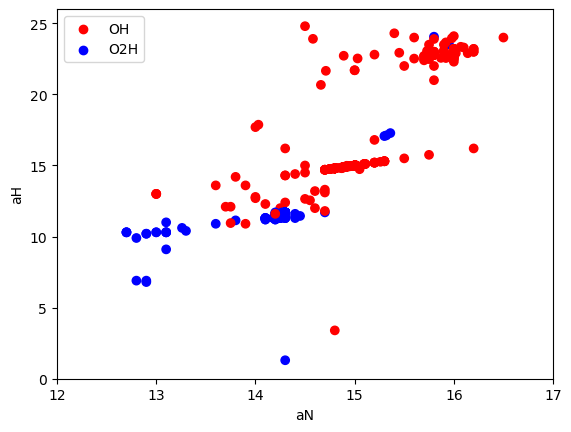

In [ ]:
# Define a color mapping dictionary
color_map = {
    'OH': 'red',
    'O2H': 'blue',
}

# Map the categories to colors using the color mapping dictionary
colors = [color_map[category] for category in data['Spin Trap']]

# Create scatter plot with mapped colors
plt.scatter(data['aN'], data['aH'], c=colors)

# Optionally, add color legend
for category, color in color_map.items():
    plt.scatter([], [], color=color, label=category)

plt.legend()
plt.xlim(12, 17)  # Change the x-axis limits from 0 to 6
plt.ylim(0, 26)  # Change the y-axis limits from 0 to 7
plt.xlabel('aN')
plt.ylabel('aH')
plt.show()

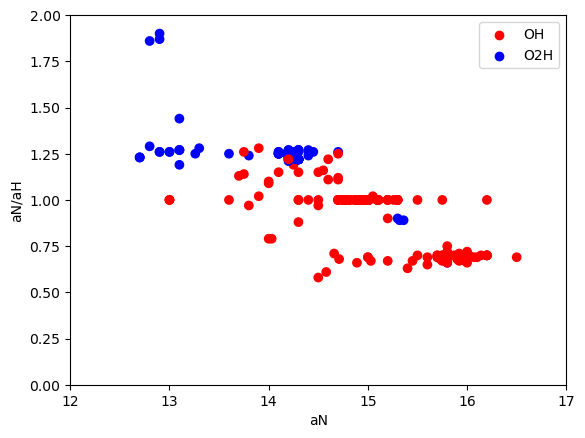

In [ ]:
# Define a color mapping dictionary
color_map = {
    'OH': 'red',
    'O2H': 'blue',
}

# Map the categories to colors using the color mapping dictionary
colors = [color_map[category] for category in data['Spin Trap']]

# Create scatter plot with mapped colors
plt.scatter(data['aN'], data['aN/aH'], c=colors)

# Optionally, add color legend
for category, color in color_map.items():
    plt.scatter([], [], color=color, label=category)

plt.legend()
plt.xlim(12, 17)  # Change the x-axis limits from 0 to 6
plt.ylim(0, 2)  # Change the y-axis limits from 0 to 7
plt.xlabel('aN')
plt.ylabel('aN/aH')
plt.show()

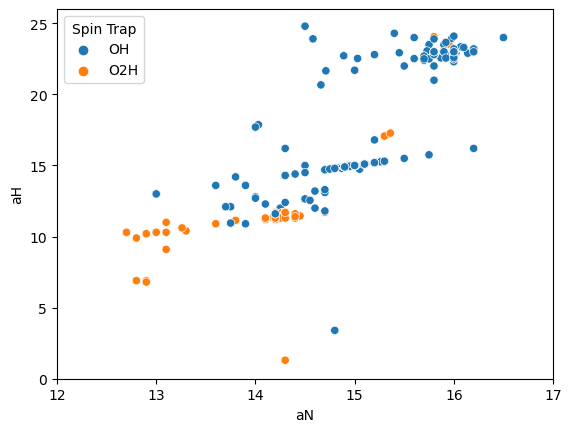

In [ ]:
import seaborn as sns
sns.scatterplot(x=data['aN'],y=data['aH'],hue=data['Spin Trap'])
plt.xlim(12, 17)  # Change the x-axis limits from 0 to 6
plt.ylim(0, 26)  # Change the y-axis limits from 0 to 7
plt.xlabel('aN')
plt.ylabel('aH')
plt.show()

In [ ]:
y=data['Spin Trap']
X=data.iloc[:,1:4]

In [ ]:
y

0       OH
1       OH
2       OH
3       OH
4      O2H
      ... 
560     OH
561     OH
562     OH
563     OH
564     OH
Name: Spin Trap, Length: 565, dtype: object

In [ ]:
X

,aN,aH,aN/aH
0,15.80,22.80,0.69
1,14.97,14.97,1.00
2,15.30,15.30,1.00
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
560,14.90,14.90,1.00
561,14.70,11.80,1.25
562,16.00,23.00,0.70
563,15.30,15.30,1.00


In [ ]:
data.isnull().mean() * 100

Spin Trap with comments     0.000000
aN                         12.920354
aH                         13.274336
aN/aH                      19.469027
Comments                    0.000000
Spin Trap                   0.000000
dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)

LabelEncoder()

In [ ]:
le.classes_

array(['O2H', 'OH'], dtype=object)

In [ ]:
y_trf=le.transform(y)

In [ ]:
y_trf

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_trf,test_size=0.2,random_state=2)

In [ ]:
X_train.shape

(452, 3)

In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

<Axes: xlabel='aH', ylabel='Density'>

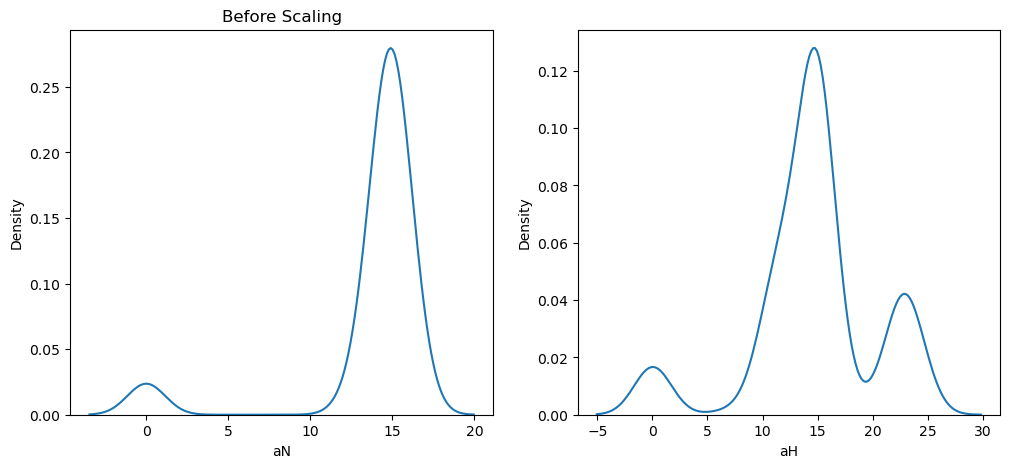

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['aN'],ax=ax1)
sns.kdeplot(X_train['aH'],ax=ax2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train_trf,y_train)

LogisticRegression()

In [ ]:
y_pred = lor.predict(X_test_trf)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
accuracy_score(y_test,y_pred)

0.9292035398230089

In [ ]:
confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n")
cdf=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred))
print("Recall - ",recall_score(y_test,y_pred))
print("F1 score - ",f1_score(y_test,y_pred))

Confusion Matrix

    0   1
0  12   7
1   1  93
--------------------------------------------------
Precision -  0.93
Recall -  0.9893617021276596
F1 score -  0.9587628865979382


In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer()
X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [ ]:
lor.fit(X_train_trf2,y_train)
y_pred2 = lor.predict(X_test_trf2)

In [ ]:
accuracy_score(y_test,y_pred2)

0.9292035398230089

In [ ]:
print(lor.coef_)
print(lor.intercept_)
coef=lor.coef_
intercept=lor.intercept_

[[-0.59081747  0.68561317 -2.50597947]]
[2.80610534]


In [ ]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [ ]:
x_input = np.linspace(12,17,100)
y_input = m1*x_input + b1

(0.0, 25.0)

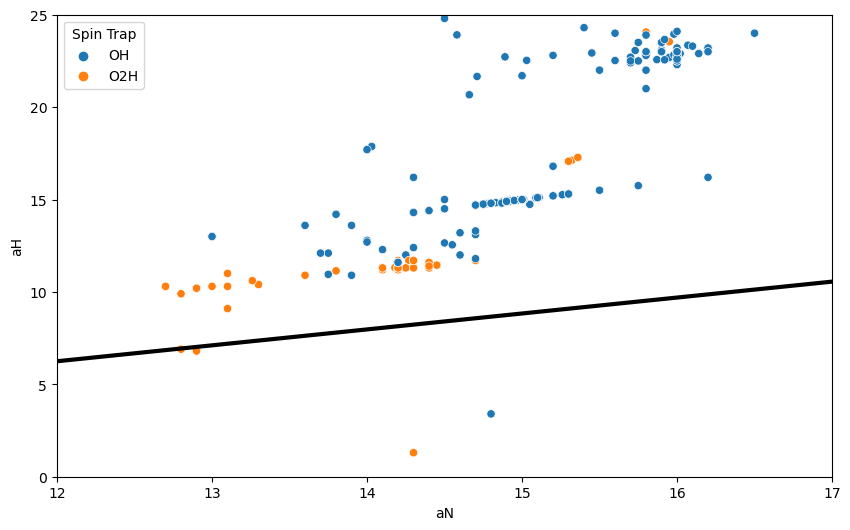

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='black',linewidth=3)
sns.scatterplot(x=X['aN'],y=X['aH'],hue=y)
plt.xlim(12,17)
plt.ylim(0,25)

In [ ]:
a=coef[0][0]
b=coef[0][1]
c=coef[0][2]
d=intercept

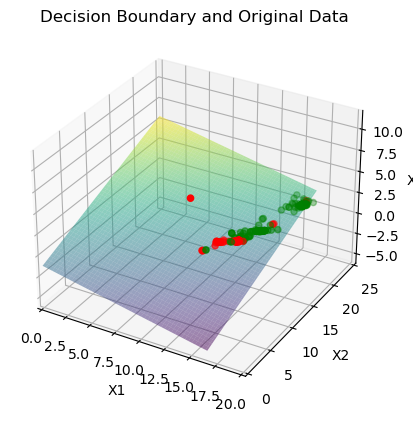

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Calculate x3 for the decision boundary
x1 = np.linspace(X['aN'].min(), X['aN'].max(), 100)
x2 = np.linspace(X['aH'].min(), X['aH'].max(), 100)
X1, X2 = np.meshgrid(x1, x2)
X3 = (-a*X1 - b*X2 + d) / c

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, X3, alpha=0.5, cmap='viridis')

# Convert class labels to colors using a colormap
cmap = ListedColormap(['red', 'green'])  # You can choose different colors as needed

# Plot scatter plot of original dataset
sc = ax.scatter(X['aN'], X['aH'], X['aN/aH'], c=y_trf, cmap=cmap)

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.xlim(0,20)
plt.ylim(0,25)
plt.title('Decision Boundary and Original Data')

#plt.colorbar(sc, ticks=[0, 1], label='Class')
#plt.legend()
plt.show()


In [ ]:
knn = KNNImputer(n_neighbors=3,weights='distance')

X_trf = knn.fit_transform(X)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Initialize cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(lor, X_trf, y_trf, cv=kfold)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())


Cross-Validation Scores: [0.89473684 0.87719298 0.89473684 0.92982456 0.92982456 0.91071429
 0.96428571 0.80357143 0.91071429 0.85714286]
Mean CV Score: 0.8972744360902256


In [ ]:
import joblib
# Save the trained model
joblib.dump(lor, "model.pkl")

['model.pkl']